<a href="https://colab.research.google.com/github/shaking54/CS114.K21.KHTN/blob/master/Folio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/My Drive/Folio Leaf Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [ ]:
imagenette_map = {
    "ashanti cherry" : "ashanti cherry",
     "barbados cherry" : "barbados cherry",
     "beaumier du perou" : "beaumier du perou",
     "betel":"betel",
     "bitter orange":"bitter orange",
     "caricature plant":"caricature plant",
     "chinese guava":"chinese guava",
     "chocolate tree":"chocolate tree",
     "chrysanthemum":"chrysanthemum",
     "coeur demoiselle":"coeur demoiselle",
     "coffee":"coffee",
     "croton":"croton",
     "duranta gold":"duranta gold",
     "eggplant":"eggplant",
     "ficus":"ficus",
     "fruitcitere":"fruitcitere",
     "geranium":"geranium",
     "guava":"guava",
     "hibiscus":"hibiscus",
     "jackfruit":"jackfruit",
     "ketembilla":"ketembilla",
     "lychee":"lychee",
     "mulberry leaf":"mulberry leaf",
     "papaya":"papaya",
     "pimento":"pimento",
     "pomme jacquot":"pomme jacquot",
     "rose":"rose",
     "star apple":"star apple",
     "sweet olive":"sweet olive",
     "sweet potato":"sweet potato",
     "thevetia":"thevetia",
     "vieux garcon":"vieux garcon",
}

In [ ]:
labels = ["ashanti cherry",
     "barbados cherry",
     "beaumier du perou",
     "betel",
     "bitter orange",
     "caricature plant",
     "chinese guava",
     "chocolate tree",
     "chrysanthemum",
     "coeur demoiselle",
     "coffee",
     "croton",
     "duranta gold",
     "eggplant",
     "ficus",
     "fruitcitere",
     "geranium",
     "guava",
     "hibiscus",
     "jackfruit",
     "ketembilla",
     "lychee",
     "mulberry leaf",
     "papaya",
     "pimento",
     "pomme jacquot",
     "rose",
     "star apple",
     "sweet olive",
     "sweet potato",
     "thevetia",
     "vieux garcon"]

In [61]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img
# create a new generator
imagegen = ImageDataGenerator()
# load train data
train = imagegen.flow_from_directory("/content/Folio Leaf Dataset/Folio/train", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))
# load val data
val = imagegen.flow_from_directory("/content/Folio Leaf Dataset/Folio/val", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))

Found 478 images belonging to 32 classes.
Found 159 images belonging to 32 classes.


In [62]:
train.class_indices

{'ashanti blood': 0,
 'barbados cherry': 1,
 'beaumier du perou': 2,
 'betel': 3,
 'bitter orange': 4,
 'caricature plant': 5,
 'chinese guava': 6,
 'chocolate tree': 7,
 'chrysanthemum': 8,
 'coeur demoiselle': 9,
 'coffee': 10,
 'croton': 11,
 'duranta gold': 12,
 'eggplant': 13,
 'ficus': 14,
 'fruitcitere': 15,
 'geranium': 16,
 'guava': 17,
 'hibiscus': 18,
 'jackfruit': 19,
 'ketembilla': 20,
 'lychee': 21,
 'mulberry leaf': 22,
 'papaya': 23,
 'pimento': 24,
 'pomme jacquot': 25,
 'rose': 26,
 'star apple': 27,
 'sweet olive': 28,
 'sweet potato': 29,
 'thevetia': 30,
 'vieux garcon': 31}

In [63]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

# build a sequential model
model = Sequential()
model.add(InputLayer(input_shape=(224, 224, 3)))

# 1st conv block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())
# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# ANN block
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))
# output layer
model.add(Dense(units=32, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# fit on data for 30 epochs
model.fit_generator(train, epochs=30, validation_data=val)

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


4/4 [==============================] - 133s 33s/step - loss: 4.1117 - accuracy: 0.0063 - val_loss: 19.9202 - val_accuracy: 0.0314
Epoch 2/30
4/4 [==============================] - 113s 28s/step - loss: 3.3418 - accuracy: 0.0837 - val_loss: 19.3466 - val_accuracy: 0.0314
Epoch 3/30
4/4 [==============================] - 112s 28s/step - loss: 3.0556 - accuracy: 0.1506 - val_loss: 23.4970 - val_accuracy: 0.0314
Epoch 4/30
4/4 [==============================] - 112s 28s/step - loss: 2.7350 - accuracy: 0.2238 - val_loss: 24.2864 - val_accuracy: 0.0566
Epoch 5/30
4/4 [==============================] - 111s 28s/step - loss: 2.4907 - accuracy: 0.2992 - val_loss: 25.3669 - val_accuracy: 0.0629
Epoch 6/30
4/4 [==============================] - 112s 28s/step - loss: 2.1706 - accuracy: 0.3703 - val_loss: 26.9156 - val_accuracy: 0.0503
Epoch 7/30
4/4 [==============================] - 111s 28s/step - loss: 1.9046 - accuracy: 0.4540 - val_loss: 24.4485 - val_accuracy: 0.0503
Epoch 8/30
4/4 [========

/content/Folio Leaf Dataset/Folio/val/rose/IMG_5296.JPG
hibiscus


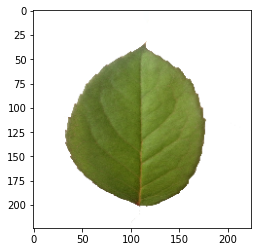

In [131]:
import matplotlib.pyplot as plt
path = input()
image = load_img(path, target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
print(labels[model.predict_classes(image)[0]])
image = np.reshape(image, (224,224,3))
pic = array_to_img(image)
plt.imshow(pic)